

---


***By:- PRANJAL ARORA, 102003402, 3C0-16***

---





In [98]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

In [99]:
import imblearn
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

In [100]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from scipy.stats import norm
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

%matplotlib inline

In [102]:
creditcarddata = pd.read_csv("/content/sample_data/Creditcard_data.csv")
creditcarddata

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


In [103]:
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
import plotly_express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


In [105]:
df = creditcarddata
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [106]:
df.info #tells about null values 

<bound method DataFrame.info of      Time        V1        V2        V3        V4        V5        V6  \
0       0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1       0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2       1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
..    ...       ...       ...       ...       ...       ...       ...   
767   575 -0.572263  0.731748  1.541254  0.150506  1.108974  0.372152   
768   579 -1.296845 -0.511605  2.404726 -0.310762 -0.319551 -0.542842   
769   579  1.214170  0.210481  0.484651  0.479768 -0.261955 -0.527039   
770   580  1.267030 -0.071114  0.037680  0.512683  0.242392  0.705212   
771   581  1.153758  0.132273  0.382969  1.405063 -0.224287 -0.197295   

           V7        V8        V9  ...       V21       V22       V23  \
0    0.239599  0.09

In [107]:
print('Not Fraudulent:-')
print(round(df['Class'].value_counts()[0]/len(df) * 100,2),'%')

Not Fraudulent:-
98.83 %


In [109]:
print('Fraudulent:-')
print(round(df['Class'].value_counts()[1]/len(df) * 100,2),'%')

Fraudulent:-
1.17 %


Text(0.5, 1.0, 'Class Distributions \n (0 stands for "Not Fraud" and  1 stands for "Fraud")')

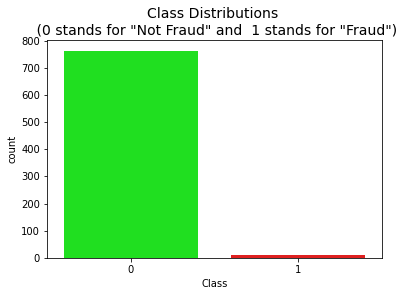

In [110]:
colors = ["#00FF00", "#FF0000"]
sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0 stands for "Not Fraud" and  1 stands for "Fraud")', fontsize=14)

In [111]:
#SCALING THE DATASET

In [112]:
scale = RobustScaler()
df['time_new'] = scale.fit_transform(df['Time'].values.reshape(-1,1))
df['amount_new'] = scale.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)


In [113]:
amt = df['amount_new']
time = df['time_new']
df.drop(['amount_new', 'time_new'], axis=1, inplace=True)
df.insert(0, 'amount_new', amt)
df.insert(1, 'time_new', time)
df

,amount_new,time_new,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.683791,-0.923077,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.282095,-0.923077,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,7.307126,-0.919804,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,2.156540,-0.919804,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,1.076403,-0.916530,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.202967,0.959083,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,...,0.056544,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,0
768,1.278462,0.972177,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,...,-0.349668,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,0
769,-0.215684,0.972177,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,...,-0.071540,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,0
770,-0.086899,0.975450,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,...,-0.066990,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,0


In [114]:
#SAMPLING USING:- Random Under-Sampling, Smote Over-Sampling, Smote+EEN Sampling, Systematic Sampling, Stratified Sampling

In [115]:
#UNDERSAMPLING THE MAJORITY CLASS(NOT FRAUD) USING RANDOM-UNDER SAMPLING

In [116]:
from imblearn.under_sampling import RandomUnderSampler

In [117]:
X = df.drop('Class', axis=1)
y = df['Class']
randsampler = RandomUnderSampler(random_state=42)
X_rs, y_rs = randsampler.fit_resample(X,y)

In [118]:
random_df = pd.DataFrame(np.hstack((X_rs,y_rs[:, None])), columns=df.columns)
random_df.Class = random_df.Class.astype(int)
random_df.head()

,amount_new,time_new,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.154118,-0.055646,-0.491003,0.906953,1.645423,-0.083531,-0.195560,-0.710165,0.559119,0.116340,...,0.062757,-0.168067,-0.517387,0.018650,0.491652,-0.277795,0.043841,0.253372,0.111749,0
1,-0.296427,-0.320786,-0.143256,0.743649,1.534072,1.062170,0.208187,-0.838623,0.524151,-0.294661,...,0.271423,-0.205014,-0.460893,0.047407,0.339243,-0.779439,0.234456,-0.024125,-0.049898,0
2,0.038252,0.929624,1.166360,0.005061,0.497768,0.798920,-0.365524,-0.233421,-0.074210,-0.008325,...,-0.118735,-0.195728,-0.365798,0.030729,0.123133,0.381749,0.296735,-0.007175,0.011905,0
3,-0.158761,-0.504092,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,...,-0.160406,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,0
4,-0.276241,-0.117840,-1.069200,1.239963,0.545157,1.005354,-0.025696,-0.910673,0.422442,0.049283,...,-0.134162,0.146555,0.602990,0.132656,0.427113,-0.084030,-0.417194,-0.897885,-0.462042,0


In [119]:
group = random_df.groupby('Class')['time_new'].count()
fig = go.Figure()
fig.add_trace(go.Bar(name='counts',x=group.index, y=group.values, marker_line_color='black', marker_line_width=2,text=group.values,textposition='outside'))
fig.update_yaxes(title_text='Number of Cases')
fig.update_xaxes(title_text='Case',nticks=3)
fig.update_layout(template='seaborn',hovermode='closest',title='Number of Fraud vs Not Fraud Cases',width=700,height=400,xaxis=dict(mirror=True,linecolor='black',linewidth=2), yaxis=dict(mirror=True,linecolor='black',linewidth=2),margin=dict(t=50,b=0,l=70,r=0))
fig.show()

In [120]:
print('Percentage of Not Frauds: {}%'.format(round(random_df.Class.value_counts()[0]/len(random_df) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(random_df.Class.value_counts()[1]/len(random_df) * 100.0,2)))


Percentage of Not Frauds: 50.0%
Percentage of Frauds: 50.0%


In [121]:
#OVERSAMPLING THE MINORTIY CLASS(FRAUD) USING SMOTE OVERSAMPLING

In [122]:
from imblearn.over_sampling import SMOTE

In [123]:
smotedata = creditcarddata
smotedata

,amount_new,time_new,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.683791,-0.923077,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.282095,-0.923077,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,7.307126,-0.919804,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,2.156540,-0.919804,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,1.076403,-0.916530,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.202967,0.959083,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,...,0.056544,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,0
768,1.278462,0.972177,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,...,-0.349668,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,0
769,-0.215684,0.972177,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,...,-0.071540,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,0
770,-0.086899,0.975450,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,...,-0.066990,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,0


In [124]:
X = smotedata.drop('Class', axis=1)
y = smotedata['Class']
oversample = SMOTE()
X_smo, y_smo = oversample.fit_resample(X, y)

In [125]:
smote_df = pd.DataFrame(np.hstack((X_smo,y_smo[:, None])), columns=smotedata.columns)
smote_df.Class = smote_df.Class.astype(int)
smote_df.head()

,amount_new,time_new,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.683791,-0.923077,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.282095,-0.923077,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,7.307126,-0.919804,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,2.156540,-0.919804,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,1.076403,-0.916530,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [126]:
group = smote_df.groupby('Class')['time_new'].count()
fig = go.Figure()
fig.add_trace(go.Bar(name='counts',x=group.index, y=group.values, marker_line_color='black', marker_line_width=2,text=group.values,textposition='outside'))
fig.update_yaxes(title_text='Number of Cases')
fig.update_xaxes(title_text='Case',nticks=3)
fig.update_layout(template='seaborn',hovermode='closest',title='Number of Fraud vs Non-Fraud Cases',width=700,height=400,xaxis=dict(mirror=True,linecolor='black',linewidth=2), yaxis=dict(mirror=True,linecolor='black',linewidth=2),margin=dict(t=50,b=0,l=70,r=0))
fig.show()

In [127]:
print('Percentage of Not Frauds: {}%'.format(round(smote_df.Class.value_counts()[0]/len(smote_df) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(smote_df.Class.value_counts()[1]/len(smote_df) * 100.0,2)))

Percentage of Not Frauds: 50.0%
Percentage of Frauds: 50.0%


In [128]:
#SMOTE ENN SAMPLING

In [129]:
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import cross_validate

In [130]:
smeedata = creditcarddata
smeedata

,amount_new,time_new,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.683791,-0.923077,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.282095,-0.923077,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,7.307126,-0.919804,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,2.156540,-0.919804,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,1.076403,-0.916530,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.202967,0.959083,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,...,0.056544,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,0
768,1.278462,0.972177,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,...,-0.349668,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,0
769,-0.215684,0.972177,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,...,-0.071540,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,0
770,-0.086899,0.975450,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,...,-0.066990,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,0


In [131]:
X = smeedata.drop('Class', axis = 1)
y = smeedata['Class']
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
Xsmee , ysmee = resample.fit_resample(X,y)

In [132]:
smee_df = pd.DataFrame(np.hstack((Xsmee,ysmee[:, None])), columns=smeedata.columns)
smee_df.Class = smee_df.Class.astype(int)
smee_df.head()

,amount_new,time_new,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.683791,-0.923077,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,7.307126,-0.919804,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
2,2.156540,-0.919804,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
3,1.076403,-0.916530,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
4,-0.262313,-0.916530,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0


In [133]:
print('Percentage of Not Frauds: {}%'.format(round(smee_df.Class.value_counts()[0]/len(smee_df) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(smee_df.Class.value_counts()[1]/len(smee_df) * 100.0,2)))

Percentage of Not Frauds: 48.2%
Percentage of Frauds: 51.8%


In [134]:
#STRATIFIED SAMPLING

In [135]:
stratdata = creditcarddata
stratdata

,amount_new,time_new,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.683791,-0.923077,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.282095,-0.923077,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1
2,7.307126,-0.919804,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,2.156540,-0.919804,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,1.076403,-0.916530,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.202967,0.959083,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,...,0.056544,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,0
768,1.278462,0.972177,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,...,-0.349668,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,0
769,-0.215684,0.972177,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,...,-0.071540,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,0
770,-0.086899,0.975450,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,...,-0.066990,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,0


In [136]:
from sklearn.model_selection import StratifiedShuffleSplit as ss

In [137]:
def counts(df, var):
    c = df[var].value_counts(dropna=False)
    p = df[var].value_counts(dropna=False, normalize=True)
    return pd.concat([c,p], axis=1, keys=['counts', '%'])

In [138]:
sp = ss(test_size=0.1)
for x, y in sp.split(stratdata, stratdata['Class']):
    dfx = stratdata.iloc[x]
    dfy = stratdata.iloc[y]

In [139]:
print('Shape:')
print(dfy.shape[0],'\n')

Shape:
78 



In [140]:
display(counts(dfy, 'Class'))

,counts,%
0,77,0.987179
1,1,0.012821


In [141]:
def sample_stratified(dataframe, size, variable):
    sp = ss(test_size=size)
    for _, y in sp.split(dataframe, dataframe[variable]):
        dataframe_y = dataframe.iloc[y]
    return dataframe_y

In [142]:
stratf_df = sample_stratified(stratdata, 0.1, 'Class')
display(stratf_df.head(3))

,amount_new,time_new,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
514,-0.336395,0.320786,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,...,0.065979,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0
656,-0.003331,0.700491,-2.009893,0.522693,2.043510,0.223521,-0.597859,0.078163,-0.450347,0.772471,...,-0.150668,-0.126642,0.080104,0.272598,0.088534,0.317082,0.419253,0.281494,0.060872,0
315,0.268167,-0.180033,1.120599,-0.313308,0.395309,0.596756,-0.420412,0.325862,-0.404105,0.283071,...,-0.183093,-0.039016,0.005732,-0.108844,-0.283233,0.441306,0.579529,-0.026439,-0.007082,0


In [143]:
print('Shape:-')
display(stratf_df.shape)

Shape:-


(78, 31)

In [144]:
display(counts(stratf_df,'Class'))

,counts,%
0,77,0.987179
1,1,0.012821


In [145]:
def sample_stratified_new(dataframe, size, variable):
    p = (size / len(dataframe))
    sp = ss(test_size=p)
    for _, y in sp.split(dataframe, dataframe[variable]):
        dataframe_y = dataframe.iloc[y]
    return dataframe_y

In [146]:
stratf_df_new = sample_stratified_new(smote_df, 100, 'Class')
display(stratf_df_new.head(3))

,amount_new,time_new,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
552,0.471034,0.428805,-1.075652,1.101233,0.579164,-0.459366,0.600011,0.160927,0.573488,0.274773,...,0.372269,-0.074954,-0.016218,-0.267397,-0.982177,-0.009294,0.266081,0.158421,-0.059168,0
998,-0.297326,-0.215721,0.245341,0.325106,0.869533,0.329622,0.464695,-0.447870,0.348846,-0.022809,...,-0.091050,-0.095345,-0.227887,-0.059112,-0.016045,0.267158,-0.132952,-0.051606,-0.048002,1
1311,-0.306309,-0.544279,0.402711,0.467171,0.367873,0.213046,0.598361,0.153207,0.185893,0.123484,...,-0.051327,-0.157317,-0.457509,0.136374,-1.062494,-0.930962,0.090273,0.160885,0.166749,1


In [147]:
print('Shape:-')
display(stratf_df_new.shape)

Shape:-


(100, 31)

In [148]:
display(counts(stratf_df_new,'Class'))

,counts,%
0,50,0.5
1,50,0.5


In [149]:
#SYSTEMATIC SAMPLING

In [150]:
length = len(smote_df)
shape = 100
interval = length // shape
rd.seed(None)
first = rd.randint(0, interval)
print('first element:',first)

first element: 15


In [151]:
indexes = np.arange(first, length, step = interval)

In [152]:
sys_df = smote_df.iloc[indexes]
display(sys_df.head(3))

,amount_new,time_new,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
15,-0.013625,-0.883797,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,...,0.263451,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,0
30,0.012414,-0.844517,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,...,-0.066351,-0.245682,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,0
45,0.094368,-0.811784,1.138316,0.056956,0.649419,0.873062,-0.468466,-0.410195,-0.013898,-0.072440,...,-0.078355,-0.164222,-0.247401,0.059405,0.456286,0.361004,0.274414,-0.002498,0.017109,0


In [153]:
print('Shape:-')
display(sys_df.shape)

Shape:-


(101, 31)

In [154]:
def sample_systematic(dataframe, sample_size, state = None):
    length = len(smote_df)
    interval = length // sample_size
    rd.seed(state)
    first = rd.randint(0, interval)
    indexes = np.arange(first, length, step = interval)
    return dataframe.iloc[indexes]

In [155]:
sys_df = sample_systematic(smote_df, 100)
display(sys_df.head(3))

,amount_new,time_new,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
14,0.850525,-0.883797,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,...,-1.582122,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,0
29,-0.074182,-0.847791,1.059387,-0.175319,1.266130,1.186110,-0.786002,0.578435,-0.767084,0.401046,...,-0.178023,0.013676,0.213734,0.014462,0.002951,0.294638,-0.395070,0.081461,0.024220,0
44,-0.013625,-0.811784,-0.762256,0.127768,2.650056,-1.875663,-0.893356,-0.268715,-0.419864,0.146233,...,0.359393,0.433350,1.260403,-0.404700,0.094946,0.480976,-0.090685,0.319223,0.135600,0


In [156]:
print('Percentage of Not Frauds: {}%'.format(round(sys_df.Class.value_counts()[0]/len(sys_df) * 100.0,2)))
print('Percentage of Frauds: {}%'.format(round(sys_df.Class.value_counts()[1]/len(sys_df) * 100.0,2)))

Percentage of Not Frauds: 50.5%
Percentage of Frauds: 49.5%


In [157]:
#CLASSIFICATION - Random Forest Classifier, Decision Tree Classifier, Logistic Regression, K-Nearest-Neighbour Classifier, Support Vector Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import collections

In [198]:
# APPLYING ALL MODELS ON Random Under Sampling

In [199]:
X = random_df.drop('Class', axis=1)
y = random_df['Class'] 

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
classifiers_models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC()
}

In [202]:
sample1 = []

for key, classifier in classifiers_models.items():
    classifier.fit(X_train, y_train)
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))
    sample1.append(round(cv_score.mean()*100.0, 2))

Random Forest Classifier: 53.33
Decision Tree: 73.33
Logistic Regression: 80.0
KNearest: 36.67
Support Vector Classifier: 63.33


In [203]:
sample1

[53.33, 73.33, 80.0, 36.67, 63.33]

In [204]:
# APPLYING ALL MODELS ON SMOTE Over Sampling

In [205]:
X = smote_df.drop('Class', axis=1)
y = smote_df['Class']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
sample2 = []

for key, classifier in classifiers_models.items():
    classifier.fit(X_train, y_train)
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))
    sample2.append(round(cv_score.mean()*100.0, 2))

Random Forest Classifier: 99.67
Decision Tree: 98.44
Logistic Regression: 92.38
KNearest: 95.41
Support Vector Classifier: 97.46


In [208]:
sample2

[99.67, 98.44, 92.38, 95.41, 97.46]

In [209]:
# APPLYING ALL MODELS ON SMOTE+EEN Sampling

In [210]:
X = smee_df.drop('Class', axis=1)
y = smee_df['Class']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
sample3 = []

for key, classifier in classifiers_models.items():
    classifier.fit(X_train, y_train)
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))
    sample3.append(round(cv_score.mean()*100.0, 2))

Random Forest Classifier: 99.92
Decision Tree: 97.96
Logistic Regression: 92.87
KNearest: 97.45
Support Vector Classifier: 98.39


In [213]:
sample3

[99.92, 97.96, 92.87, 97.45, 98.39]

In [214]:
# APPLYING ALL MODELS ON Stratified Sampling

In [215]:
X = stratf_df_new.drop('Class', axis=1)
y = stratf_df_new['Class']

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
sample4 = []

for key, classifier in classifiers_models.items():
    classifier.fit(X_train, y_train)
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))
    sample4.append(round(cv_score.mean()*100.0, 2))

Random Forest Classifier: 93.75
Decision Tree: 88.75
Logistic Regression: 90.0
KNearest: 76.25
Support Vector Classifier: 90.0


In [218]:
sample4

[93.75, 88.75, 90.0, 76.25, 90.0]

In [219]:
# APPLYING ALL MODELS ON Systematic Sampling

In [220]:
X = sys_df.drop('Class', axis=1)
y = sys_df['Class']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
sample5 = []

for key, classifier in classifiers_models.items():
    classifier.fit(X_train, y_train)
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))
    sample5.append(round(cv_score.mean()*100.0, 2))

Random Forest Classifier: 95.0
Decision Tree: 92.5
Logistic Regression: 90.0
KNearest: 72.5
Support Vector Classifier: 87.5


In [223]:
sample5

[95.0, 92.5, 90.0, 72.5, 87.5]

In [224]:
#SCORES OF EACH MODEL ON EACH SAMPLE

In [225]:
keys = ['Random Undersampling','Smote Oversampling','SMOTE+EEN Oversampling','Stratified sampling','Systematic sampling']

In [226]:
from tabulate import tabulate
print(tabulate({'Classifiers Models':['Random Forest Classifier','Decision Tree','Logistic Regression','KNearest','Support Vector Classifier'],
    'Random Under-Sampling': sample1, 
                'Smote Over-Sampling': sample2, 
                'Smote ENN Over-sampling': sample3,
               'Stratified Sampling': sample4,
               'Systematic Sampling': sample5}, 
                headers='keys', 
                tablefmt='fancy_grid'))

╒═══════════════════════════╤═════════════════════════╤═══════════════════════╤═══════════════════════════╤═══════════════════════╤═══════════════════════╕
│ Classifiers Models        │   Random Under-Sampling │   Smote Over-Sampling │   Smote EEN Over-sampling │   Stratified Sampling │   Systematic Sampling │
╞═══════════════════════════╪═════════════════════════╪═══════════════════════╪═══════════════════════════╪═══════════════════════╪═══════════════════════╡
│ Random Forest Classifier  │                   53.33 │                 99.67 │                     99.92 │                 93.75 │                  95   │
├───────────────────────────┼─────────────────────────┼───────────────────────┼───────────────────────────┼───────────────────────┼───────────────────────┤
│ Decision Tree             │                   73.33 │                 98.44 │                     97.96 │                 88.75 │                  92.5 │
├───────────────────────────┼─────────────────────────┼─────────

In [226]:
#Random Forest Classifer gives highest score for Smote ENN Over-Sampling